In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import Planck13, z_at_value
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import numpy as np
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm
import subprocess
import os
import disperse

In [2]:
cosmo = Planck13

In [3]:
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0

In [4]:
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [5]:
coma = pd.read_csv('coma_filtered_RaDecZ.csv')
clusters = pd.read_csv('clusters_filtered_RaDecZ.csv')

In [6]:
DPS = disperse.Disperse(
    coma, clusters, '_disperse_03/bin/',
    H0, Om, Ol, Ok
)

In [7]:
DPS.count_cart_coords()

In [8]:
SIGMA = 3
SMOOTH = 1
BOARD = 'smooth'

In [9]:
DPS.apply_disperse(SIGMA, SMOOTH, BOARD)

In [10]:
cl_conn, cl_maxmap, \
fils_conn, maxs_maxmap, \
count_fils, count_maxs = DPS.count_conn_maxmap(
    DPS.clusters['R500'] * 3,
    DPS.clusters['R500'] * 3
)

In [11]:
sum(list(map(lambda x: int(x>0), cl_conn)))

39

In [12]:
a = list(map(lambda x: x>0, cl_conn))

In [13]:
count_fils, count_maxs

(73, 5)

AxesSubplot(0.125,0.125;0.775x0.755)


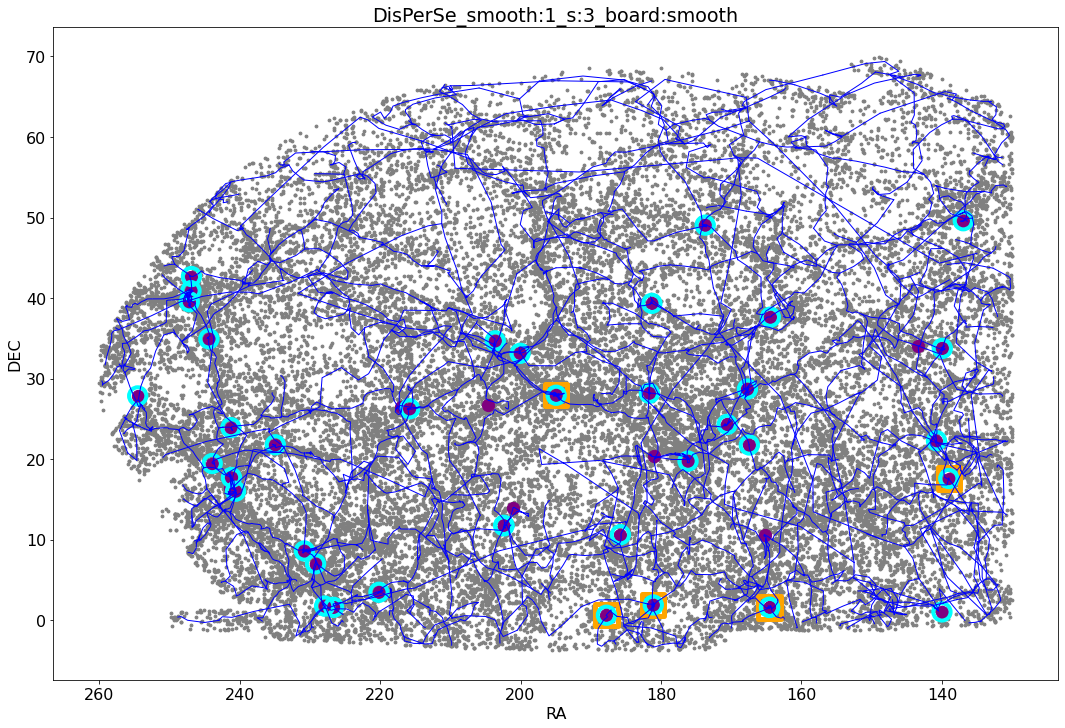

In [14]:
fig = DPS.plot_2d(
    plot_cps=False, plot_only_max=False,
    cl_fils=list(map(lambda x: x>0, cl_conn)),
    cl_maxs=list(map(lambda x: x>0, cl_maxmap))
)